Lectura de datos FALTA CAMBIAR LAS RUTAS

In [2]:
#! pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download paultimothymooney/chest-xray-pneumonia
! unzip chest-xray-pneumonia
! del chest-xray-pneumonia.zip
print("Hola mundo!")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
 

In [3]:
import os
import numpy as np
import csv
from PIL import Image
import cv2

In [4]:
# Leer una imagen y convertirla a una matriz
def leer_imagen(ruta):
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (480,720))
    #img = np.array(img)
  
    vimg = []
    for lista in img:
      vimg.append(lista)
    vimg = np.array(vimg)
    return vimg

In [5]:
# Iterar por una carpeta de imagenes y retornar una lista de rutas
def iterar_imagenes(ruta):
    lista = []
    for root, dirs, files in os.walk(ruta):
        for file in files:
            if file.endswith(".jpeg"):
                lista.append(os.path.join(root, file))
    return lista

In [6]:

def leerImagenes():
    rutaTrainNormal = "/content/chest_xray/train/NORMAL"
    rutaTrainPulmonia = "/content/chest_xray/train/PNEUMONIA"
    rutaTestNormal = "/content/chest_xray/test/NORMAL"
    rutaTestPulmonia = "/content/chest_xray/test/PNEUMONIA"
    RUTASTrainNormal = iterar_imagenes(rutaTrainNormal)
    RUTASTrainPulmonia = iterar_imagenes(rutaTrainPulmonia)
    RUTASTestNormal = iterar_imagenes(rutaTestNormal)
    RUTASTestPulmonia = iterar_imagenes(rutaTestPulmonia)
    RUTASTrain = [RUTASTrainNormal, RUTASTrainPulmonia]
    RUTASTest = [RUTASTestNormal, RUTASTestPulmonia]
    #ListaImagenes debe tener 4 elementos, que incluyen las carpetas de imagenes 
    #separadas por rutas y por lo tanto clasificación.
    # 0:TrainNormales
    # 1:TrainPulmonia
    # 2:TestNormal
    # 3:TestPulmonia
    valores = []


    listaImagenesTrain = []

    for ruta in RUTASTrain:
        imagenes = []
        for imagen in ruta:
            imagenLectura = leer_imagen(imagen)
            if("NORMAL" in imagen):
              valor = 0
            else:
              valor = 1
            
            arregloAYUDA = imagenLectura
            valores.append(valor)
            listaImagenesTrain.append(arregloAYUDA)

    
    
    listaImagenesTrain = listaImagenesTrain
    return listaImagenesTrain, valores
    

In [7]:
hola = leerImagenes()


In [8]:
ImagenesCHILAS, VALORES = hola


In [9]:
VALORES = np.array(VALORES)

In [10]:
import sklearn as sk
ImagenesCHILAS , VALORES= sk.utils.shuffle(ImagenesCHILAS,VALORES)  

In [11]:
hola = np.array(ImagenesCHILAS).reshape(5216,720,480)


In [12]:
print(hola.shape)

(5216, 720, 480)


1


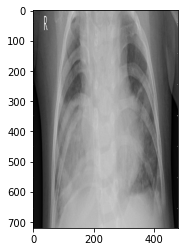

In [13]:
import matplotlib.pyplot as plt
plt.imshow(hola[0],cmap='gray')
print(VALORES[0])

HOLA FELIPE GOD

In [14]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers

In [125]:
model = keras.Sequential([])
model.add(layers.Rescaling(1./255-1, input_shape=(720, 480, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.LeakyReLU())

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.LeakyReLU())

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer='l1'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 720, 480, 1)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 720, 480, 32)      320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 720, 480, 32)      0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 360, 240, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 358, 238, 64)      18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 358, 238, 64)      0         
                                                      

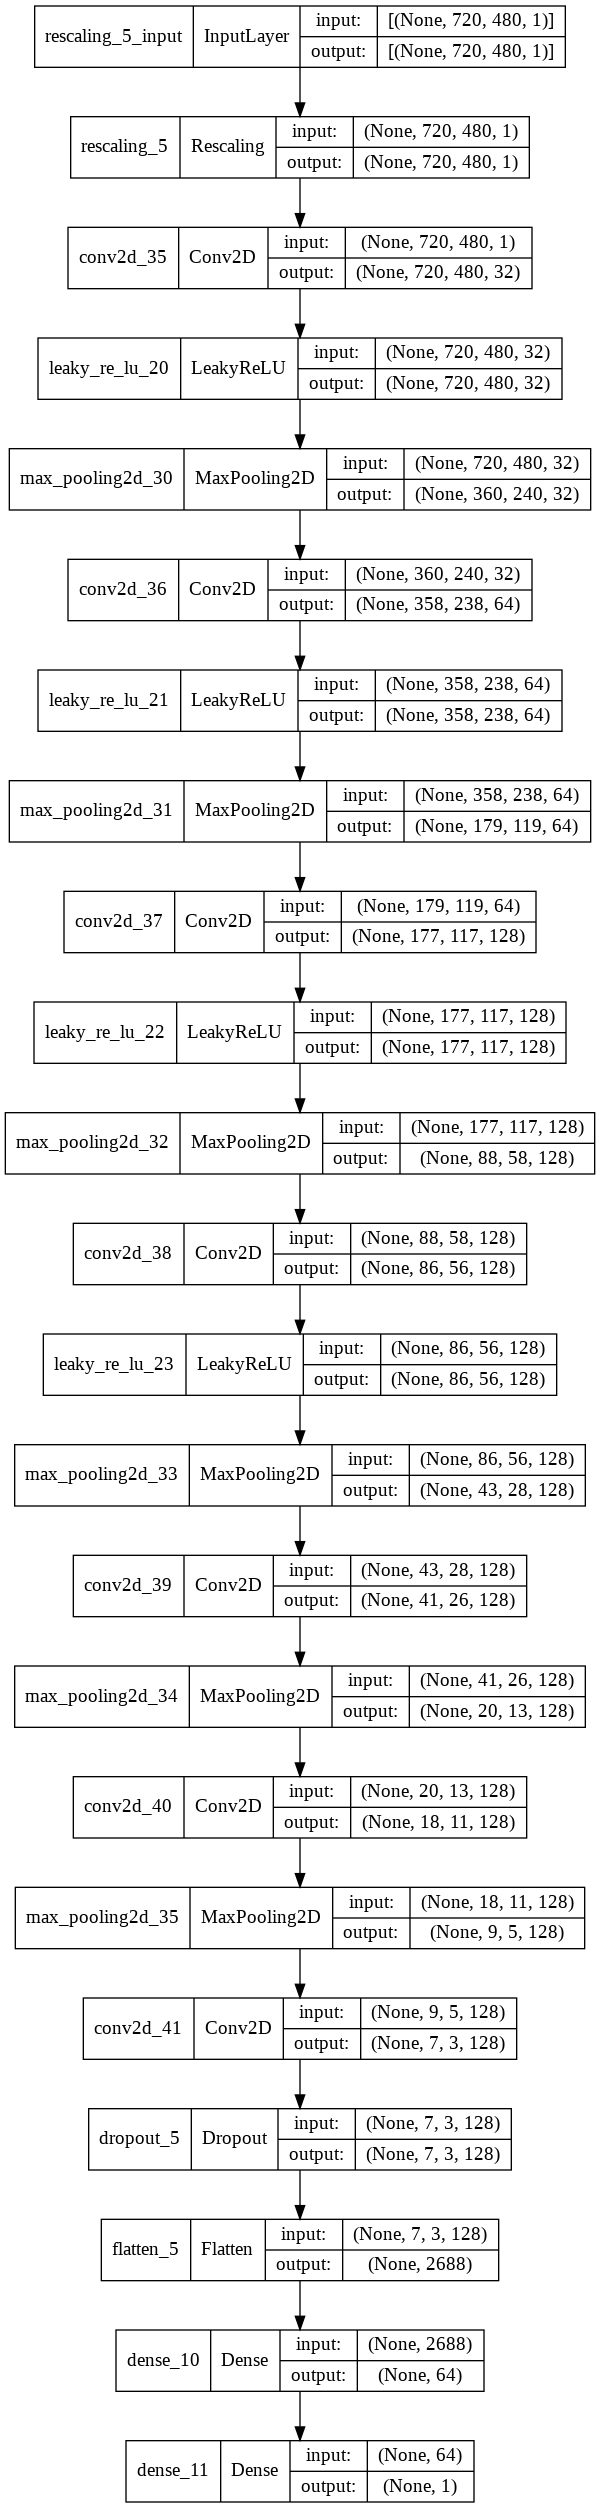

In [ ]:
keras.utils.plot_model(model, 'clasificador de phneumonia.png',show_shapes=True)

In [ ]:
#hola = hola / 127.5 - 1

In [16]:
def leerImagenes2():
    rutaTrainNormal = "/content/chest_xray/train/NORMAL"
    rutaTrainPulmonia = "/content/chest_xray/train/PNEUMONIA"
    rutaTestNormal = "/content/chest_xray/test/NORMAL"
    rutaTestPulmonia = "/content/chest_xray/test/PNEUMONIA"
    RUTASTrainNormal = iterar_imagenes(rutaTrainNormal)
    RUTASTrainPulmonia = iterar_imagenes(rutaTrainPulmonia)
    RUTASTestNormal = iterar_imagenes(rutaTestNormal)
    RUTASTestPulmonia = iterar_imagenes(rutaTestPulmonia)
    RUTASTrain = [RUTASTrainNormal, RUTASTrainPulmonia]
    RUTASTest = [RUTASTestNormal, RUTASTestPulmonia]
    #ListaImagenes debe tener 4 elementos, que incluyen las carpetas de imagenes 
    #separadas por rutas y por lo tanto clasificación.
    # 0:TrainNormales
    # 1:TrainPulmonia
    # 2:TestNormal
    # 3:TestPulmonia
    valores = []


    listaImagenesTrain = []

    for ruta in RUTASTest:
        imagenes = []
        for imagen in ruta:
            imagenLectura = leer_imagen(imagen)
            if("NORMAL" in imagen):
              valor = 0
            else:
              valor = 1
            
            arregloAYUDA = imagenLectura
            valores.append(valor)
            listaImagenesTrain.append(arregloAYUDA)

    
    
    listaImagenesTrain = listaImagenesTrain
    return listaImagenesTrain, valores

In [17]:
hola2 = leerImagenes2()


In [18]:
ImagenesCHILAS2, VALORES2 = hola2

In [19]:

VALORES2 = np.array(VALORES2)
ImagenesCHILAS2 , VALORES2 = sk.utils.shuffle(ImagenesCHILAS2,VALORES2)
hola2 = np.array(ImagenesCHILAS2).reshape(-1,720,480)
print(hola2.shape)

(624, 720, 480)


In [126]:
historial = []
historial_val = []
historial_acc = []
historial_accVal = []

In [145]:
for i in range(4,8):
  history = model.fit(hola[(i)*400:(i+1)*400],VALORES[i*400:(i+1)*400],batch_size=10,validation_data=(hola2,VALORES2))
  historial.append(history.history['loss'])
  historial_val.append(history.history['val_loss'])
  historial_acc.append(history.history['accuracy'])
  historial_accVal.append(history.history['val_accuracy'])

  print(history)

40/40 [==============================] - 17s 430ms/step - loss: 0.5149 - accuracy: 0.9000 - val_loss: 1.1115 - val_accuracy: 0.7676


In [ ]:
model = tf.keras.models.load_model('modelo.h5')

In [ ]:
predicciones = np.round(model.predict(hola2[0:12]))
print(predicciones, VALORES2[0:12])

[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]] [1 0 1 1 0 0 1 1 1 0 1 1]


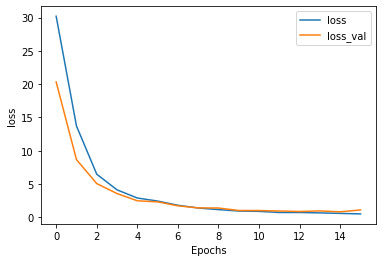

In [146]:
plt.plot(historial,label = "loss")
plt.plot(historial_val,label = "loss_val")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

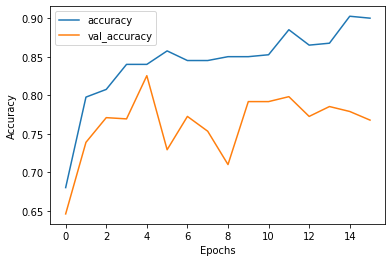

In [147]:
plt.plot(historial_acc,label = 'accuracy')
plt.plot(historial_accVal,label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [148]:
print("Historial:")
print(historial)
print(historial_val)
print("Presisi[on")
print(historial_acc)
print(historial_accVal)
print()

Historial:
[[30.2020206451416], [13.72447395324707], [6.478431224822998], [4.1284708976745605], [2.904000759124756], [2.444462299346924], [1.8147376775741577], [1.4042844772338867], [1.1607266664505005], [0.9474549293518066], [0.8945654034614563], [0.7278932929039001], [0.7293292880058289], [0.6685491800308228], [0.5946958661079407], [0.514937162399292]]
[[20.33555030822754], [8.67568302154541], [5.069704532623291], [3.5706639289855957], [2.4874250888824463], [2.325540542602539], [1.7272319793701172], [1.4188095331192017], [1.401147723197937], [1.0289703607559204], [1.0215822458267212], [0.9488243460655212], [0.8791664242744446], [0.9643968343734741], [0.8308241367340088], [1.1114637851715088]]
Presisi[on
[[0.6800000071525574], [0.7975000143051147], [0.8075000047683716], [0.8399999737739563], [0.8399999737739563], [0.8575000166893005], [0.8450000286102295], [0.8450000286102295], [0.8500000238418579], [0.8500000238418579], [0.8525000214576721], [0.8849999904632568], [0.8650000095367432]

In [149]:
#crear rows
filas = []
for i in range(4):
  rows = [historial[i-4],historial_val[i-4],historial_acc[i-4],historial_accVal[i-4]]
  print(rows)
  filas.append(rows)
print(filas)

[[0.7293292880058289], [0.8791664242744446], [0.8650000095367432], [0.7724359035491943]]
[[0.6685491800308228], [0.9643968343734741], [0.8675000071525574], [0.7852563858032227]]
[[0.5946958661079407], [0.8308241367340088], [0.9024999737739563], [0.7788461446762085]]
[[0.514937162399292], [1.1114637851715088], [0.8999999761581421], [0.7676281929016113]]
[[[0.7293292880058289], [0.8791664242744446], [0.8650000095367432], [0.7724359035491943]], [[0.6685491800308228], [0.9643968343734741], [0.8675000071525574], [0.7852563858032227]], [[0.5946958661079407], [0.8308241367340088], [0.9024999737739563], [0.7788461446762085]], [[0.514937162399292], [1.1114637851715088], [0.8999999761581421], [0.7676281929016113]]]


In [150]:
with open('Registros.csv', 'a') as f:
    writer = csv.writer(f)

    for Row in filas:
      writer.writerow(Row)

In [ ]:
def leerImagenes2():
    rutaTrainNormal = "/content/chest_xray/train/NORMAL"
    rutaTrainPulmonia = "/content/chest_xray/train/PNEUMONIA"
    rutaTestNormal = "/content/chest_xray/test/NORMAL"
    rutaTestPulmonia = "/content/chest_xray/test/PNEUMONIA"
    RUTASTrainNormal = iterar_imagenes(rutaTrainNormal)
    RUTASTrainPulmonia = iterar_imagenes(rutaTrainPulmonia)
    RUTASTestNormal = iterar_imagenes(rutaTestNormal)
    RUTASTestPulmonia = iterar_imagenes(rutaTestPulmonia)
    RUTASTrain = [RUTASTrainNormal, RUTASTrainPulmonia]
    RUTASTest = [RUTASTestNormal, RUTASTestPulmonia]
    #ListaImagenes debe tener 4 elementos, que incluyen las carpetas de imagenes 
    #separadas por rutas y por lo tanto clasificación.
    # 0:TrainNormales
    # 1:TrainPulmonia
    # 2:TestNormal
    # 3:TestPulmonia
    valores = []


    listaImagenesTrain = []

    for ruta in RUTASTest:
        imagenes = []
        for imagen in ruta:
            imagenLectura = leer_imagen(imagen)
            if("NORMAL" in imagen):
              valor = 0
            else:
              valor = 1
            
            arregloAYUDA = imagenLectura
            valores.append(valor)
            listaImagenesTrain.append(arregloAYUDA)

    
    
    listaImagenesTrain = listaImagenesTrain
    return listaImagenesTrain, valores

In [ ]:
hola2 = leerImagenes2()


In [ ]:
ImagenesCHILAS2, VALORES2 = hola2
VALORES2 = np.array(VALORES2)
ImagenesCHILAS2 , VALORES2 = sk.utils.shuffle(ImagenesCHILAS2,VALORES2)
hola2 = np.array(ImagenesCHILAS2).reshape(-1,720,480)
print(hola2.shape)

(624, 720, 480)


In [ ]:
model.fit(hola[400:800],VALORES[400:800])


 4/13 [========>.....................] - ETA: 3:41 - loss: 0.5290 - accuracy: 0.8828

KeyboardInterrupt: ignored

Red Pulmonar Neumonica

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
model.save('modelo2.h5')

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


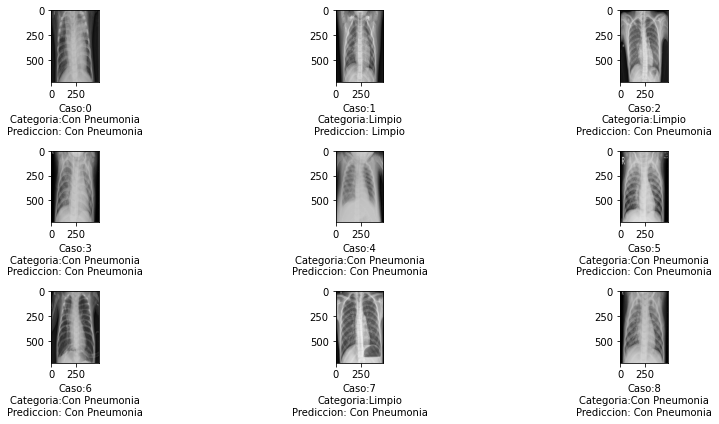

In [ ]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
dicc = ['Limpio','Con Pneumonia']
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(0,num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(hola2[i],cmap='gray')
  print(predicciones[i])
  plt.xlabel("Caso:"+str(i)+"\n"+"Categoria:"+dicc[VALORES2[i]]+'\n'+'Prediccion: '+ dicc[int(predicciones[i])])
  
plt.tight_layout()
plt.show()